# HW3
## Name: Guanda Jiang
## USC ID:2837333230

**Q1.a**

*Download the data*

In [381]:
import pandas as pd
import os
import glob

path = 'AReM'
folders = os.listdir(path)
folders.sort()
datasets = []

In [382]:
for folder in folders[1:8]:      # ignor .DS_Store file
    list_ = os.listdir(path + '/' + folder)
    list_.sort()
    list_.sort(key = len)
    print(folder)
    for file in list_:
        print(file)
        df = pd.read_csv(path + '/' + folder + '/' + file, index_col = None, header = 4, usecols = [0,1,2,3,4,5,6])
        datasets.append(df)

print(len(datasets))

bending1
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
 dataset1.csv
bending2
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
cycling
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
lying
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
sitting
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
dataset14.csv
dataset15.csv
standing
dataset1.csv
dataset2.csv
dataset3.csv
dataset4.csv
dataset5.csv
dataset6.csv
dataset7.csv
dataset8.csv
dataset9.csv
dataset10.csv
dataset11.csv
dataset12.csv
dataset13.csv
datas

**Q1.b**

*Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.*

In [383]:
instance = range(1,89)
activity = ['bending1','bending1','bending1','bending1','bending1','bending1','bending1',
            'bending2','bending2','bending2','bending2','bending2','bending2',
            'cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling',
            'cycling','cycling','cycling','cycling','cycling','cycling','cycling',
            'lying','lying','lying','lying','lying','lying','lying','lying','lying','lying',
            'lying','lying','lying','lying','lying',
            'sitting','sitting','sitting','sitting','sitting','sitting','sitting','sitting',
            'sitting','sitting','sitting','sitting','sitting','sitting','sitting',
            'standing','standing','standing','standing','standing','standing','standing','standing',
            'standing','standing','standing','standing','standing','standing','standing',
            'walking','walking','walking','walking','walking','walking','walking','walking',
            'walking','walking','walking','walking','walking','walking','walking']
type = ['test','test','train','train','train','train','train',
        'test','test','train','train','train','train',
        'test','test','test','train','train','train','train','train','train','train','train','train','train','train','train',
        'test','test','test','train','train','train','train','train','train','train','train','train','train','train','train',
        'test','test','test','train','train','train','train','train','train','train','train','train','train','train','train',
        'test','test','test','train','train','train','train','train','train','train','train','train','train','train','train',
        'test','test','test','train','train','train','train','train','train','train','train','train','train','train','train']

In [384]:
import numpy as np
table = []
for i,j,k,n in zip(range(0,88),instance,activity,type):
    time_series = np.array(datasets[i].iloc[:,1:]).transpose()
    table.append([j,time_series,k,n])
table = pd.DataFrame(table,columns = ['instance','time-series','activity','type'])
table

,instance,time-series,activity,type
0,1,"[[43.67, 43.33, 42.75, 41.75, 42.5, 43.5, 42.7...",bending1,test
1,2,"[[42.0, 41.5, 41.5, 40.75, 40.0, 41.25, 42.25,...",bending1,test
2,3,"[[47.33, 47.5, 47.5, 47.0, 45.0, 41.0, 36.25, ...",bending1,train
3,4,"[[44.33, 44.5, 44.0, 43.0, 42.75, 42.25, 42.0,...",bending1,train
4,5,"[[41.25, 41.0, 44.25, 45.0, 45.25, 45.33, 46.7...",bending1,train
...,...,...,...,...
83,84,"[[42.33, 30.25, 30.0, 35.67, 39.0, 38.0, 37.25...",walking,train
84,85,"[[29.75, 41.25, 34.5, 31.33, 29.67, 37.33, 33....",walking,train
85,86,"[[33.5, 27.75, 32.25, 34.5, 34.25, 35.25, 24.0...",walking,train
86,87,"[[31.5, 27.0, 34.0, 32.0, 35.33, 42.75, 33.75,...",walking,train


In [385]:
test = table['type']=='test'
test_set = table[test]
test_set.index = range(0,19)
train = table['type']=='train'
train_set = table[train]
train_set.index = range(0,69)

**Q1.c.i**

*Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).*

**Answer: mean, Root Mean Square value, absolute average, skewness, kurtosis value, variance, maximum, minimum, peak**

**Q1.c.ii**

*Extract the time-domain features minimum, maximum, mean, median, stan-
dard deviation, first quartile, and third quartile for all of the 6 time series
in each instance.*

In [386]:
feature = []

for i in range(0,88):
    for j in range(1,7):
        instance = datasets[i].iloc[:,j]
        minimum = instance.min()
        maximum = instance.max()
        mean = instance.mean()
        median = instance.median()
        sd = instance.std()
        Q1 = pd.Series.quantile(instance,q=0.25,interpolation = 'midpoint')
        Q3 = pd.Series.quantile(instance,q=0.75,interpolation = 'midpoint')
        feature.append([minimum, maximum, mean, median, sd, Q1, Q3])

In [387]:
import numpy as np
columns = ['min(1)', 'max(1)', 'mean(1)', '50%(1)', 'std(1)', '25%(1)', '75%(1)',
           'min(2)', 'max(2)', 'mean(2)', '50%(2)', 'std(2)', '25%(2)', '75%(2)',
           'min(3)', 'max(3)', 'mean(3)', '50%(3)', 'std(3)', '25%(3)', '75%(3)',
           'min(4)', 'max(4)', 'mean(4)', '50%(4)', 'std(4)', '25%(4)', '75%(4)',
           'min(5)', 'max(5)', 'mean(5)', '50%(5)', 'std(5)', '25%(5)', '75%(5)',
           'min(6)', 'max(6)', 'mean(6)', '50%(6)', 'std(6)', '25%(6)', '75%(6)']
new = np.array(feature)
new = new.reshape(88,42)
new = pd.DataFrame(data = new,columns = columns)
new    # time_domain features

,min(1),max(1),mean(1),50%(1),std(1),25%(1),75%(1),min(2),max(2),mean(2),...,std(5),25%(5),75%(5),min(6),max(6),mean(6),50%(6),std(6),25%(6),75%(6)
0,38.00,45.67,42.812812,42.50,1.435550,42.00,43.670,0.0,1.22,0.372438,...,1.995255,32.000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.000,1.300
1,35.00,47.40,43.954500,44.33,1.558835,43.00,45.000,0.0,1.70,0.426250,...,1.999604,35.325,36.50,0.00,1.79,0.493292,0.43,0.513506,0.000,0.940
2,33.00,47.75,42.179813,43.50,3.670666,39.10,45.000,0.0,3.00,0.696042,...,3.849448,30.415,36.33,0.00,2.18,0.613521,0.50,0.524317,0.000,1.000
3,33.00,45.75,41.678063,41.75,2.243490,41.33,42.750,0.0,2.83,0.535979,...,2.411026,28.415,31.25,0.00,1.79,0.383292,0.43,0.389164,0.000,0.500
4,37.00,48.00,43.454958,43.25,1.386098,42.50,45.000,0.0,1.58,0.378083,...,2.488862,22.250,24.00,0.00,5.26,0.679646,0.50,0.622534,0.430,0.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.000,0.0,14.67,4.576562,...,3.283983,13.710,18.25,0.00,8.32,3.259729,3.11,1.640243,2.050,4.325
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.000,0.0,13.47,4.456333,...,3.119856,13.500,17.75,0.00,9.67,3.432562,3.20,1.732727,2.145,4.570
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.875,0.0,12.47,4.371958,...,2.823124,14.000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.160,4.350
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.250,0.0,14.82,4.380583,...,3.131076,13.750,18.00,0.00,9.51,3.424646,3.27,1.690960,2.170,4.500


**Q1.c.iii**

*Estimate the standard deviation of each of the time-domain features you extracted from the data.
Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.*

In [388]:
# pip install bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

CI = []
for i in range(0,42):
    sample = np.array(new.iloc[:,i])
    CI.append(bs.bootstrap(sample,stat_func = bs_stats.std,alpha=0.1))
CI

[9.515445066931843    (8.318646001750487, 10.831208838318368),
 4.36932238296287    (3.473292577050378, 5.41610576102954),
 5.305304322388462    (4.755799785577916, 5.924890334930376),
 5.409056425357996    (4.863029299412498, 6.060762353104842),
 1.7620628177368878    (1.5874373779592474, 1.9610547813195287),
 6.12112251507228    (5.627258880116937, 6.700641990843937),
 5.106974608954725    (4.4150926947530404, 5.919510828733629),
 0.0    (0.0, 0.0),
 5.033881679163114    (4.693001622554546, 5.4704807673079054),
 1.5651926494525072    (1.4348964531122361, 1.7440863851360762),
 1.4041971241720508    (1.27006086718977, 1.573823209553367),
 0.8790700203583206    (0.8221309084211385, 0.9595482895548474),
 0.9398116335246466    (0.8499844038701536, 1.0539557446883114),
 2.1155431129397035    (1.9474349854179644, 2.35347729767414),
 2.9396159844182215    (2.788697786773383, 3.13203164000798),
 4.8473579111726695    (4.250844254331426, 5.544933553332363),
 3.9855540649372423    (3.5042999051

**Q1.c.iv**

*Use your judgement to select the three most important time-domain features*

In [389]:
diff = {}
for i,k in zip(range(0,42),columns):
    diff[k] = CI[i].value
    i = i+1
diff

{'min(1)': 9.515445066931843,
 'max(1)': 4.36932238296287,
 'mean(1)': 5.305304322388462,
 '50%(1)': 5.409056425357996,
 'std(1)': 1.7620628177368878,
 '25%(1)': 6.12112251507228,
 '75%(1)': 5.106974608954725,
 'min(2)': 0.0,
 'max(2)': 5.033881679163114,
 'mean(2)': 1.5651926494525072,
 '50%(2)': 1.4041971241720508,
 'std(2)': 0.8790700203583206,
 '25%(2)': 0.9398116335246466,
 '75%(2)': 2.1155431129397035,
 'min(3)': 2.9396159844182215,
 'max(3)': 4.8473579111726695,
 'mean(3)': 3.9855540649372423,
 '50%(3)': 4.013396722341803,
 'std(3)': 0.9413008797491655,
 '25%(3)': 4.196572409677858,
 '75%(3)': 4.150755407310475,
 'min(4)': 0.0,
 'max(4)': 2.171183073234498,
 'mean(4)': 1.159480049678946,
 '50%(4)': 1.139058054228987,
 'std(4)': 0.4556337359761579,
 '25%(4)': 0.8375299966874259,
 '75%(4)': 1.544348150087177,
 'min(5)': 6.089106551460676,
 'max(5)': 5.7085244261061385,
 'mean(5)': 5.643253316700765,
 '50%(5)': 5.780655201421557,
 'std(5)': 1.0190368599651933,
 '25%(5)': 6.05991470

In [390]:
min_std_all = diff['min(1)']+diff['min(2)']+diff['min(3)']+diff['min(4)']+diff['min(5)']+diff['min(6)']
max_std_all = diff['max(1)']+diff['max(2)']+diff['max(3)']+diff['max(4)']+diff['max(5)']+diff['max(6)']
mean_std_all = diff['mean(1)']+diff['mean(2)']+diff['mean(3)']+diff['mean(4)']+diff['mean(5)']+diff['mean(6)']
median_std_all = diff['50%(1)']+diff['50%(2)']+diff['50%(3)']+diff['50%(4)']+diff['50%(5)']+diff['50%(6)']
sd_std_all = diff['std(1)']+diff['std(2)']+diff['std(3)']+diff['std(4)']+diff['std(5)']+diff['std(6)']
Q1_std_all = diff['25%(1)']+diff['25%(2)']+diff['25%(3)']+diff['25%(4)']+diff['25%(5)']+diff['25%(6)']
Q3_std_all = diff['75%(1)']+diff['75%(2)']+diff['75%(3)']+diff['75%(4)']+diff['75%(5)']+diff['75%(6)']

result = {'min':min_std_all, 'max':max_std_all, 'mean':mean_std_all, 'median':median_std_all,
         'standard deviation': sd_std_all, '1st Quart': Q1_std_all, '3rd Quart': Q3_std_all}
result

{'min': 18.589744568638334,
 'max': 24.634837507412108,
 'mean': 18.807013878951057,
 'median': 18.82664706557994,
 'standard deviation': 5.571777210327106,
 '1st Quart': 18.90905903302495,
 '3rd Quart': 19.932325836109776}

**Answer: From my judgement, I want to focus on the dispersion of features, so I sum up the standard deviation
    of these time-domain features. Finally, I want to choose the three largest ones, which are 'max','1 st Quart'
    and '3rd Quart'**

**Q1.d.i**

*Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities.*

In [391]:
new['activity'] = activity   # add activity label to the feature table for classify

new_126 = new[['max(1)','max(2)','max(6)','25%(1)','25%(2)','25%(6)','75%(1)','75%(2)','75%(6)','activity']]

new_126 = new_126.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],
                [1,1,0,0,0,0,0]) # make 'bending1' and 'benidng2' as 1, others as 0

new_126 = new_126.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75]) # only train set

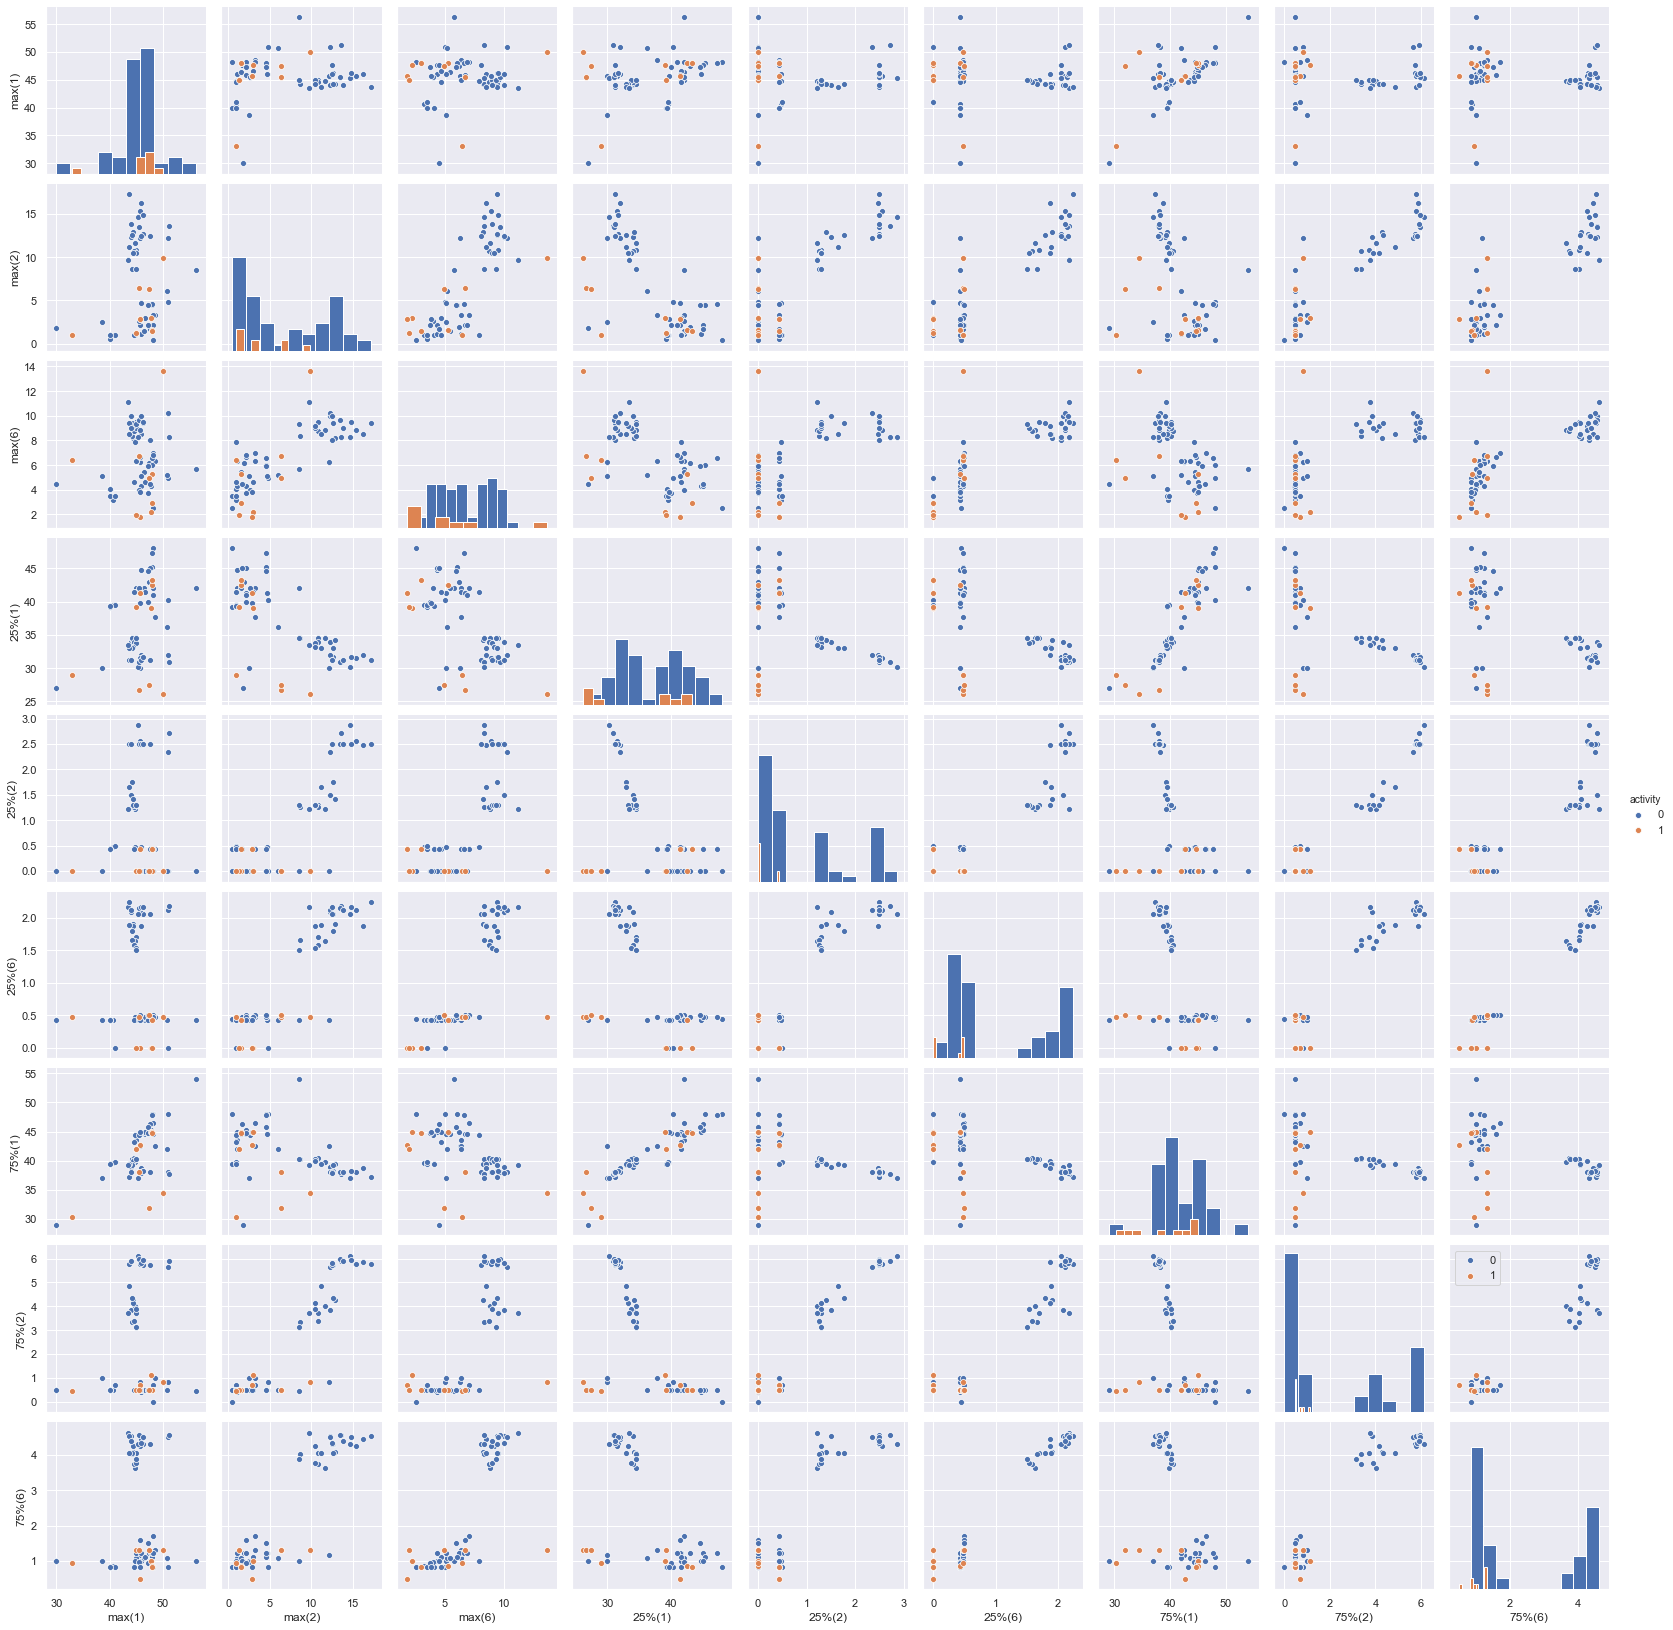

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.pairplot(new_126,hue = 'activity',diag_kind='hist')
plt.legend()

**Q1.d.ii**

*Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?*

In [393]:
time_series_12 = []

for i in range(0,69):
    for j in range(0,6):
        ts_12 = np.array_split(train_set['time-series'].iloc[i][j],2)
        time_series_12.append(ts_12)

In [394]:
features = []

for k in range(0,414):
    for i in range(0,2):
        minimum_12 = time_series_12[k][i].min()
        maximum_12 = time_series_12[k][i].max()
        mean_12 = time_series_12[k][i].mean()
        median_12 = np.median(time_series_12[k][i])
        sd_12 = time_series_12[k][i].std()
        Q1_12 = np.quantile(time_series_12[k][i],0.25)
        Q3_12 = np.quantile(time_series_12[k][i],0.75)
        features.append([minimum_12, maximum_12, mean_12, median_12, sd_12, Q1_12, Q3_12])

In [395]:
print(len(features))   # 69 datasets *6 time series *2 equal length = 828 separate data list

828


In [396]:
'''Since I break each time series to two equal length time series, I use notation 1,2,3,4,...,12 
to represent each new time series '''

columns = []
for i in range(1,13):
    columns.append(['min'+str(i), 'max'+str(i), 'mean'+str(i), '50%'+str(i), 'std'+str(i), '25%'+str(i), '75%'+str(i)])
columns = list(np.array(columns).reshape(1,84))

new_12 = np.array(features).reshape(69,84)
new_12 = pd.DataFrame(data = new_12)
new_12['activity'] = train_set['activity']


In [397]:
new_1212 = new_12.iloc[:,[1,8,78,5,12,82,6,13,83,84]]
new_1212 = new_1212.replace(
    ['bending1','bending2','cycling','lying','sitting','standing','walking'],[1,1,0,0,0,0,0])         
     # make 'bending1' and 'benidng2' as 1, others as 0

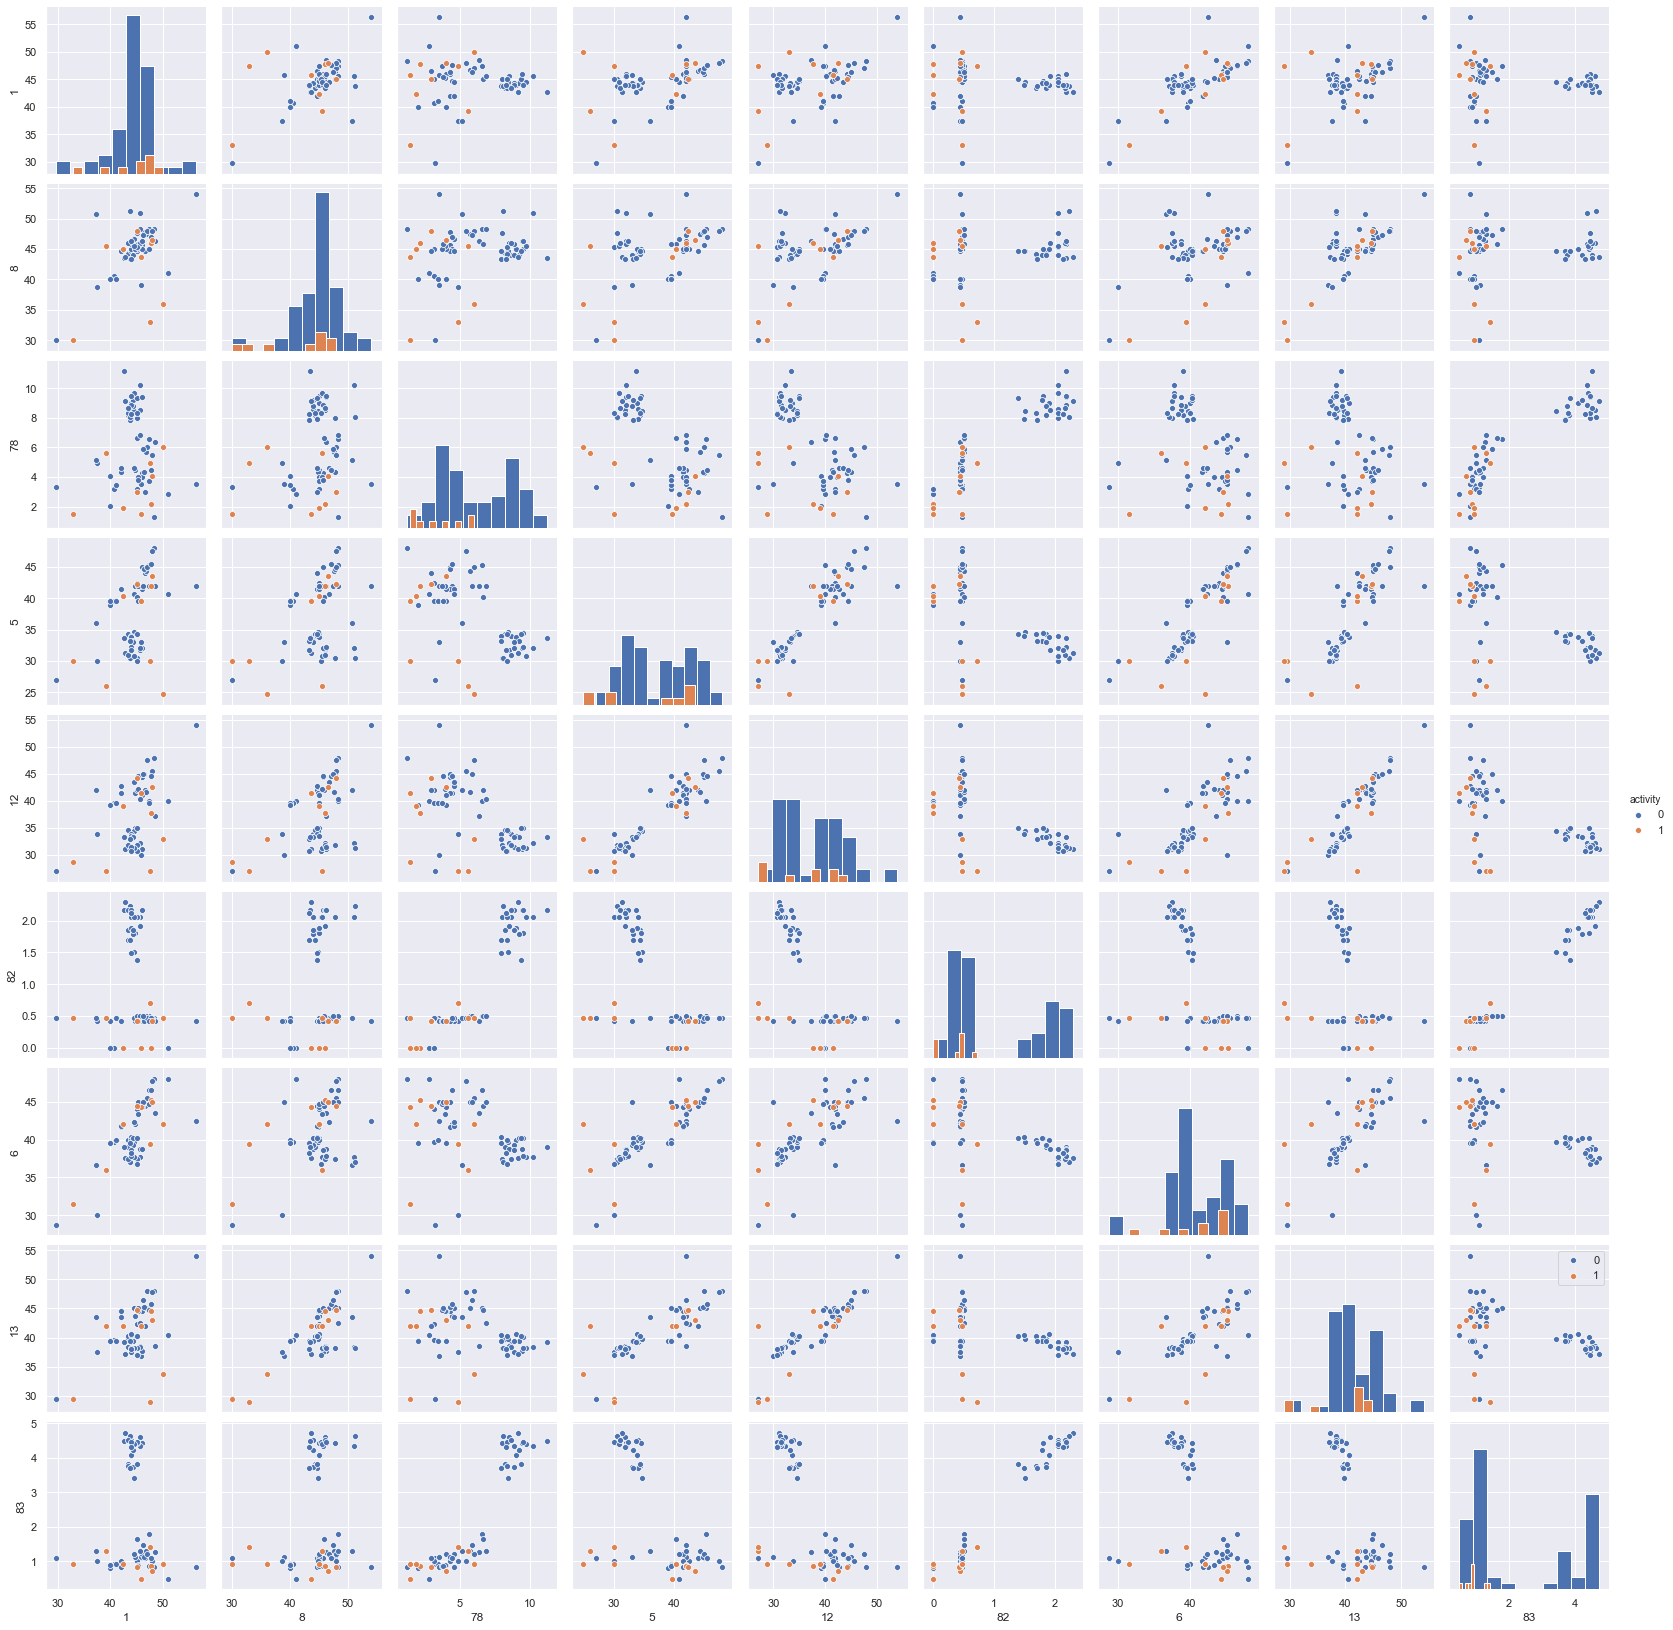

In [398]:
sns.set()
sns.pairplot(new_1212,hue = 'activity',diag_kind='hist')
plt.legend()

**Q1.d.iii**

In [399]:
each_ts = []
new_time_series = {}

for i in range(0,69):
    for j in range(0,6):
        each_ts.append(train_set['time-series'].iloc[i][j])
print(len(each_ts))

414


In [400]:
from collections import defaultdict 

split_time_series = defaultdict(list)

for l in range(1,21):
    for i in range(0, 414):
        ts = np.array_split(each_ts[i], l)
        split_time_series[l].append(ts)

print(len(split_time_series))

20


In [401]:
domain_feature = []
dic = defaultdict(list)

for l in range(1,21):   
    for i in range(0,414):
        for k in range(0,l):
            t_s = np.array(split_time_series[l][i][k])
            #minimum = t_s.min()
            maximum = t_s.max()
            #mean = t_s.mean()
            #median = np.median(t_s)
            #sd = t_s.std()
            Q1 = np.quantile(t_s,q=0.25)
            Q3 = np.quantile(t_s,q=0.75)
            dic[l].append([maximum, Q1, Q3])
print(len(dic))

20


In [402]:
split_features = []

for i in range(1,21):
    columns = []
    for j in range(1,6*i+1):
        columns.append(['max'+str(j), '25%'+str(j), '75%'+str(j)])
    columns = list(np.array(columns).reshape(1,18*i))
    split = np.array(dic[i]).reshape(69,18*i)
    split_df = pd.DataFrame(split, columns = columns)
    split_df['activity'] = train_set['activity']
    split_df = split_df.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],
                    [1,1,0,0,0,0,0])  
    split_features.append(split_df)
print(len(split_features))

20


In [403]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

dic_features = {}
grid_score = []

for i in range(20):
    data = split_features[i]
    X = data.iloc[:,0:18*(i+1)]
    y = data.iloc[:,18*(i+1)]
    model = LogisticRegression(max_iter = 300)
    rfe_cv = RFECV(model,cv = 5)
    rfe_cv = rfe_cv.fit(X, y)
    n_features = rfe_cv.n_features_
    dic_features[i+1] = n_features
    grid_score.append(rfe_cv.grid_scores_)

In [404]:
print(dic_features)

grid = []
for key in dic_features:
    grid.append(grid_score[key-1][dic_features[key]])
grid

{1: 6, 2: 1, 3: 1, 4: 1, 5: 7, 6: 1, 7: 7, 8: 4, 9: 9, 10: 34, 11: 6, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 14, 18: 1, 19: 1, 20: 1}


[0.9571428571428571,
 0.9,
 0.9285714285714285,
 0.9,
 0.9428571428571428,
 0.856043956043956,
 0.9428571428571428,
 0.9428571428571428,
 0.9285714285714285,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.8857142857142858,
 0.9285714285714285,
 0.9285714285714285,
 0.9142857142857143,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428]

In [405]:
from sklearn.feature_selection import RFE
new_X_train = []  # selected features by RFE
lp = []
score = []
coef = []
good_feature = []

for key in dic_features:
    data = split_features[key-1]
    X = data.iloc[:,0:18*(key)]
    y = data.iloc[:,18*(key)]
    model = LogisticRegression(max_iter = 300)
    selector = RFE(model,n_features_to_select = dic_features[key])
    selector = selector.fit(X, y)
    score.append(selector.score(X,y))
    lp.append('('+ str(key)+','+str(dic_features[key])+')')
    new_X = selector.transform(X)
    new_logi = model.fit(new_X,y)
    new_X_train.append(new_X)
    coef.append(new_logi)
    good_feature.append(selector.support_)
    
result = {'(l,p)':lp, 'CV Accuracy':score}
result = pd.DataFrame(result)
result

,"(l,p)",CV Accuracy
0,"(1,6)",1.000000
1,"(2,1)",0.971014
2,"(3,1)",0.971014
3,"(4,1)",0.971014
4,"(5,7)",1.000000
5,"(6,1)",0.956522
6,"(7,7)",1.000000
7,"(8,4)",1.000000
8,"(9,9)",1.000000
9,"(10,34)",1.000000


**Q1.d.iv**

*Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.*

In [406]:
# Choose (l,p) = (11,6) that has CV Accuracy score as 1
label = []
for index, s in enumerate(good_feature[10]):
    if s == True:
        label.append(index)

best_model = split_features[10].iloc[:,label]
best_model['activity'] = train_set['activity']
best_model = best_model.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],
                    [1,1,0,0,0,0,0])
best_model

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,max6,25%26,max45,25%46,75%46,25%54,activity
0,45.75,20.9175,38.67,36.9375,38.2500,26.290,1
1,45.00,15.1875,35.25,27.2500,30.0000,27.585,1
2,45.00,18.4375,33.50,22.9375,24.0000,23.125,1
3,48.00,15.0000,28.50,29.7500,30.0000,19.750,1
4,40.75,19.6875,35.25,33.0000,33.7500,29.750,1
...,...,...,...,...,...,...,...
64,41.00,12.6700,25.00,13.6275,16.7525,13.250,0
65,45.50,12.6700,22.00,14.4375,17.7500,13.775,0
66,45.00,13.1875,22.33,13.3100,17.6900,13.125,0
67,39.75,14.3100,21.50,13.1875,17.0625,14.000,0


[[60  0]
 [ 0  9]]


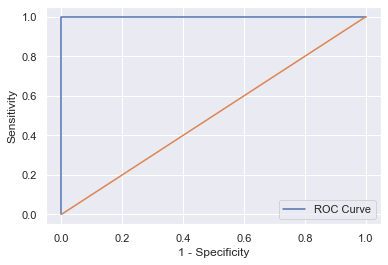

In [407]:
from sklearn import metrics

model = coef[10]
X_train = best_model.iloc[:, 0:6]
y_train = best_model.iloc[:,6]
y_pred = model.predict(X_train)
y_score = model.decision_function(X_train)

#confusion matrix
cm = metrics.confusion_matrix(y_train,y_pred)
print(cm)

#ROC Curve

roc = metrics.roc_curve(y_train, y_score)
roc_auc = metrics.roc_auc_score(y_train, y_score)
plt.plot(roc[0],roc[1],label = 'ROC Curve')
plt.plot([0,1],[0,1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [408]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
model = sm.Logit(y_train,X1)
result = model.fit(method = 'bfgs')
print(result.params)  # parameters of your logistic regression βi’s
print(result.pvalues)  # P-values

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
const      -0.340415
(max6,)    -2.126964
(25%26,)   -1.179042
(max45,)    1.517288
(25%46,)    2.970192
(75%46,)   -1.166105
(25%54,)    1.946037
dtype: float64
const       0.999986
(max6,)     0.997332
(25%26,)    0.995154
(max45,)    0.998765
(25%46,)    0.997447
(75%46,)    0.999252
(25%54,)    0.995331
dtype: float64


**Q1.d.v**

*Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.*

*break time series for test set*

In [409]:
each_ts_test = []
split_test = defaultdict(list)

for i in range(0,19):
    for j in range(0,6):
        each_ts_test.append(test_set['time-series'].iloc[i][j])       

for l in range(1,21):
    for i in range(0, 114):
        ts_test = np.array_split(each_ts_test[i], l)
        split_test[l].append(ts_test)

In [410]:
domain_feature_test = []
dic_test = defaultdict(list)

for l in range(1,21):   
    for i in range(0,114):
        for k in range(0,l):
            t_s = np.array(split_test[l][i][k])
            #minimum = t_s.min()
            maximum = t_s.max()
            #mean = t_s.mean()
            #median = np.median(t_s)
            #sd = t_s.std()
            Q1 = np.quantile(t_s,q=0.25)
            Q3 = np.quantile(t_s,q=0.75)
            dic_test[l].append([maximum, Q1, Q3])

In [411]:
split_features_test = []

for i in range(1,21):
    columns = []
    for j in range(1,6*i+1):
        columns.append(['max'+str(j), '25%'+str(j), '75%'+str(j)])
    columns = list(np.array(columns).reshape(1,18*i))
    split = np.array(dic_test[i]).reshape(19,18*i)
    split_df = pd.DataFrame(split, columns = columns)
    split_df['activity'] = test_set['activity']
    split_df = split_df.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],
                    [1,1,0,0,0,0,0])  
    split_features_test.append(split_df)

In [412]:
from sklearn.metrics import accuracy_score

test_data = split_features_test[10][['max6','25%26','max45','25%46','75%46','25%54','activity']]
X_test = np.array(test_data.iloc[:,0:6])
y_test = np.array(test_data.iloc[:,6])
clf = LogisticRegression().fit(X_test,y_test)
y_test_pred = clf.predict(X_test)
test_accur = accuracy_score(y_test,y_test_pred)
test_accur

1.0

In [413]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Q1.d.vi**

*Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?*

**Answer: Yes. When the number of splits increases, the class-imbalance becomes an issue. I plan to use SMOTE method
    to improve the model.**

**Q1.d.vii**

*From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.*

In [414]:
#pip install imblearn
from imblearn.over_sampling import SMOTE

dataset = split_features[10]
dataset = pd.DataFrame(dataset)
X = dataset.iloc[:, 0:198]
y = dataset.iloc[:,198]

smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X,y)

[[60  0]
 [ 0 60]]


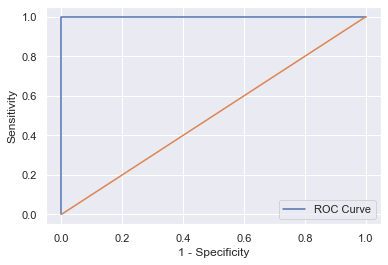

In [415]:
model = coef[10]
X = X_smo[['max6','25%26','max45','25%46','75%46','25%54','activity']]
y = y_smo
y_pred = model.predict(X)
y_score = model.decision_function(X)

#confusion matrix
cm = metrics.confusion_matrix(y,y_pred)
print(cm)

#ROC Curve
roc = metrics.roc_curve(y, y_score)
roc_auc = metrics.roc_auc_score(y, y_score)
plt.plot(roc[0],roc[1],label = 'ROC Curve')
plt.plot([0,1],[0,1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

**Q1.e.i**

*Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p-
values for variable selection, use L1 regularization. Note that in this problem,
you have to cross-validate for both l, the number of time series into which you
break each of your instances, and λ, the weight of L1 penalty in your logistic
regression objective function (or C, the budget).*

In [416]:
from sklearn.preprocessing import MinMaxScaler

scale_split = []
for i in range(20):
    scale = MinMaxScaler()
    scale_data = scale.fit_transform(split_features[i])
    scale_split.append(scale_data)

In [417]:
from sklearn.linear_model import LogisticRegressionCV

C_ = []
score = []

for i in range(20):
    data = pd.DataFrame(scale_split[i].reshape(69,18*(i+1)+1))
    X = data.iloc[:,0:18*(i+1)]
    y = data.iloc[:,18*(i+1)]
    range_Cs = [1e-4,1e-2,1,1e2,1e4]
    lrcv = LogisticRegressionCV(Cs = range_Cs, penalty = 'l1', solver = 'liblinear', cv =5, max_iter = 300)
    lr_new = lrcv.fit(X,y)
    C_.append(lr_new.C_)
    score.append(lr_new.score(X,y))

In [418]:
L = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
l_C_score = {'l': L,
             'C': C_, 'Accuracy': score}
l_C_score = pd.DataFrame(l_C_score)
l_C_score

,l,C,Accuracy
0,1,[10000.0],1.000000
1,2,[1.0],0.942029
2,3,[1.0],0.942029
3,4,[100.0],1.000000
4,5,[1.0],0.956522
5,6,[1.0],0.956522
6,7,[1.0],0.956522
7,8,[10000.0],1.000000
8,9,[100.0],1.000000
9,10,[10000.0],1.000000


**Q1.e.ii**

*Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?*

**Answer: I used backward selection method in 1.d.iii to select variables not p-value, so I cannot tell which
    one performs better, but I think that using L1-penalty is easier to implement since we can eliminate many
    features once.**

**Q1.f.i**

In [420]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

multi_C_ = []
multi_score = []
mean_cv_score = []
multi_y_score = []
multi_y_pred = []

for i in range(20):
    data = pd.DataFrame(scale_split[i].reshape(69,18*(i+1)+1))
    data = data.iloc[:,0:18*(i+1)]
    data['activity'] = train_set['activity']
    data = data.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6]) 
    X = data.iloc[:,0:18*(i+1)]
    y = data.iloc[:,18*(i+1)]
    smote = SMOTE(k_neighbors = 3)      # imbalanced class issue
    X_smo, y_smo = smote.fit_resample(X,y)
    
    data_te = pd.DataFrame(np.array(split_features_test[i]).reshape(19,18*(i+1)+1))
    data_te['activity'] = test_set['activity']
    data_te = data_te.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6])
    X_te = np.array(data_te.iloc[:,0:18*(i+1)]).reshape(-1,18*(i+1))
    y_te.append(list(data_te['activity']))
    
    range_Cs = [1e-4,1e-2,1,1e2,1e4]
    lrcv_multi = LogisticRegressionCV(Cs = range_Cs, penalty = 'l1', solver = 'saga', cv =5, 
                                      multi_class = 'multinomial', max_iter = 10000)
    lr_multi = lrcv_multi.fit(X_smo,y_smo)
    multi_C_.append(lr_multi.C_)
    multi_score.append(lr_multi.score(X_smo,y_smo))
    mean_cv_score.append(np.mean(cross_val_score(lrcv_multi,X_smo,y_smo, cv=5, scoring = 'f1_macro')))
    multi_y_score.append(lrcv_multi.decision_function(X_te))
    multi_y_pred.append(lrcv_multi.predict(X_te))

In [421]:
L = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
multi = {'l': L,'C': multi_C_, 'Accuracy': multi_score, 'mean_cv_score': mean_cv_score}
multi = pd.DataFrame(multi)
multi

,l,C,Accuracy,mean_cv_score
0,1,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.795918
1,2,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.868027
2,3,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.832653
3,4,"[10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...",1.000000,0.922313
4,5,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.930476
5,6,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.881361
6,7,"[10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...",1.000000,0.829252
7,8,"[10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...",1.000000,0.870884
8,9,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]",1.000000,0.793197
9,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.928571,0.833741


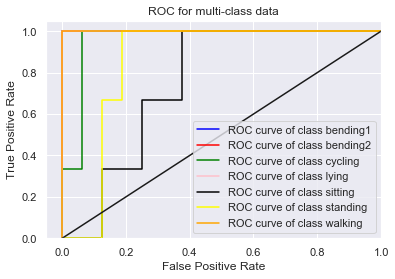

In [422]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
# When l = 5, we got highest accuracy rate and mean_cv_score
# Plotting and estimation of FPR, TPR
n_classes = 7
labels = ['bending1','bending2','cycling','lying','sitting','standing','walking']
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = y_te[4]
y_test = label_binarize(y_test, classes=list(range(n_classes)))   # Binarize labels in a one-vs-all fashion
y_score_ = multi_y_score[4]

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score_[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green','pink','black','yellow','orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0}' ''.format(labels[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [423]:
# Confusion Matrix
cm_multi = metrics.confusion_matrix(y_te[4], multi_y_pred[4], labels=[i for i in range(len(labels))])
cm_multi

array([[2, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [3, 0, 0, 0, 0, 0, 0]])

**Q1.f.ii**

*Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.*

In [424]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
nb_score = []
nb_y_score = []
nb_y_pred = []

for i in range(20):
    data = pd.DataFrame(scale_split[i].reshape(69,18*(i+1)+1))
    data = data.iloc[:,0:18*(i+1)]
    data['activity'] = train_set['activity']
    data = data.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6]) 
    X = data.iloc[:,0:18*(i+1)]
    y = data.iloc[:,18*(i+1)]
    smote = SMOTE(k_neighbors = 3)      # imbalanced class issue
    X_smo, y_smo = smote.fit_resample(X,y)
    
    data_te = pd.DataFrame(np.array(split_features_test[i]).reshape(19,18*(i+1)+1))
    data_te['activity'] = test_set['activity']
    data_te = data_te.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6])
    X_te = np.array(data_te.iloc[:,0:18*(i+1)]).reshape(-1,18*(i+1))
    y_te.append(list(data_te['activity']))
    
    logis = GaussianNB()
    logis.fit(X_smo,y_smo)
    GaussianNB(priors=True, var_smoothing=1e-09)
    nb_score.append(logis.score(X_smo,y_smo))
    nb_y_score.append(logis.predict_proba(X_te))
    nb_y_pred.append(logis.predict(X_te))

In [425]:
L = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
nb = {'l': L, 'Accuracy': nb_score}
nb = pd.DataFrame(nb)
nb

,l,Accuracy
0,1,0.952381
1,2,0.988095
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,0.988095
8,9,1.000000
9,10,1.000000


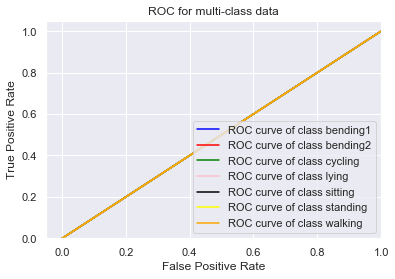

In [426]:
n_classes = 7
labels = ['bending1','bending2','cycling','lying','sitting','standing','walking']
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = y_te[4]
y_test = label_binarize(y_test, classes=list(range(n_classes)))
y_score_ = nb_y_score[4]

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score_[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green','pink','black','yellow','orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0}' ''.format(labels[i], roc_auc[i]))
    
#plt.plot([0, 1], [0, 1], 'k', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [427]:
# Confusion Matrix
cm_nb = metrics.confusion_matrix(y_te[4], nb_y_pred[4], labels=[i for i in range(len(labels))])
cm_nb

array([[0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0]])

In [428]:
# multinominal prior
from sklearn.naive_bayes import MultinomialNB
mp_score = []
mp_y_score = []
mp_y_pred = []

for i in range(20):
    data = pd.DataFrame(scale_split[i].reshape(69,18*(i+1)+1))
    data = data.iloc[:,0:18*(i+1)]
    data['activity'] = train_set['activity']
    data = data.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6]) 
    X = data.iloc[:,0:18*(i+1)]
    y = data.iloc[:,18*(i+1)]
    smote = SMOTE(k_neighbors = 3)      # imbalanced class issue
    X_smo, y_smo = smote.fit_resample(X,y)
    
    data_te = pd.DataFrame(np.array(split_features_test[i]).reshape(19,18*(i+1)+1))
    data_te['activity'] = test_set['activity']
    data_te = data_te.replace(['bending1','bending2','cycling','lying','sitting','standing','walking'],[0,1,2,3,4,5,6])
    X_te = np.array(data_te.iloc[:,0:18*(i+1)]).reshape(-1,18*(i+1))
    y_te.append(list(data_te['activity']))
    
    clf = MultinomialNB()
    clf.fit(X_smo,y_smo)
    MultinomialNB(class_prior=True)
    mp_score.append(clf.score(X_smo,y_smo))
    mp_y_score.append(clf.predict_proba(X_te))
    mp_y_pred.append(clf.predict(X_te))

In [429]:
L = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mp = {'l': L, 'Accuracy': mp_score}
mp = pd.DataFrame(mp)
mp

,l,Accuracy
0,1,0.880952
1,2,0.880952
2,3,0.904762
3,4,0.904762
4,5,0.916667
5,6,0.892857
6,7,0.904762
7,8,0.892857
8,9,0.892857
9,10,0.880952


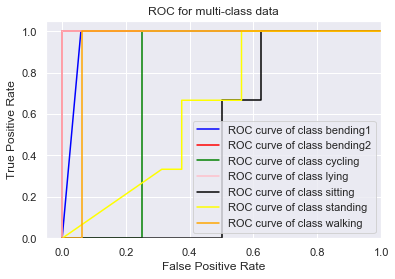

In [430]:
n_classes = 7
labels = ['bending1','bending2','cycling','lying','sitting','standing','walking']
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = y_te[4]
y_test = label_binarize(y_test, classes=list(range(n_classes)))
y_score_ = mp_y_score[4]

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score_[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green','pink','black','yellow','orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0}' ''.format(labels[i], roc_auc[i]))
    
#plt.plot([0, 1], [0, 1], 'k', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [431]:
# Confusion Matrix
cm_mp = metrics.confusion_matrix(y_te[4], mp_y_pred[4], labels=[i for i in range(len(labels))])
cm_mp

array([[2, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3, 0]])

**Q1.f.iii**

**The performance of Multinomial priors is better than that of Naive Bayes, but the performance of l1 penalized
multinomial regression model is even better than that of Multinomial priors. Therefore, in this case, I will choose
l1 penalized multinomial regression model as the best one.**

**Q2 ISLR 3.7.4**

*(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.*

 **Answer: We  would like to expect the training RSS for the cubic regression will be lower than 
        the training RSS of linear regression model since the cubic regression model is more flexible 
        than the linear regression model so that the cubic model may fit the model better.**

*(b) Answer (a) using test rather than training RSS.*

**Answer: Since the true relationship between X and Y is linear,  the cubic regression model  is excessively flexible. This method may not fit the test dataset well. Therefore, we expect cubic regression model  to have a higher test RSS than linear regression model does.**

*(c) SupposethatthetruerelationshipbetweenXandYisnotlinear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.*

**Answer: We should still expect the training RSS for the cubic regression will be lower than 
    the training RSS of linear regression model since the cubic regression model is more flexible than 
    the linear regression model so that it can fit the training dataset better.**

*(d) Answer (c) using test rather than training RSS.*

**Answer: Since we suppose the true relationship between X and Y is not linear, we do not know how to fit the true underlying model. Therefore, there is not enough information to tell the test RSS.**

**Q3 ISLR, 4.7.3**

**I answered this question by hand and scan it as a PDF file, which is also in the repository.**

**Q4 ISLR, 4.7.7**

**I answered this question by hand and scan it as a PDF file, which is also in the repository.**